In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
train = pd.read_csv("final_train.csv")

In [4]:
y = train.LoanStatus
X = train.drop('LoanStatus',axis=1)

In [5]:
X = pd.get_dummies(X)

## Check cross validation scores with different algorithms 

In [6]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [8]:
names = ['LR','KNN','NB','DT','SVC']
clfs =  [LogisticRegression(max_iter=200), KNeighborsClassifier(n_jobs=1), GaussianNB(), DecisionTreeClassifier(max_depth=5),LinearSVC(max_iter=2000, dual = True)]

In [10]:
for clf, name in zip(clfs, names):
   scores = cross_val_score(clf, X_scaled,y, cv=3)
   print(scores)
   print(f"{name} = {scores.mean()*100:0.2f}")
   all_scores[name] = (scores.mean() * 100)

[0.80851064 0.79787234 0.80851064]
LR = 80.50
[0.7712766  0.74468085 0.7393617 ]
KNN = 75.18
[0.78723404 0.79787234 0.80851064]
NB = 79.79
[0.7393617  0.79787234 0.74468085]
DT = 76.06
[0.80851064 0.79787234 0.83510638]
SVC = 81.38


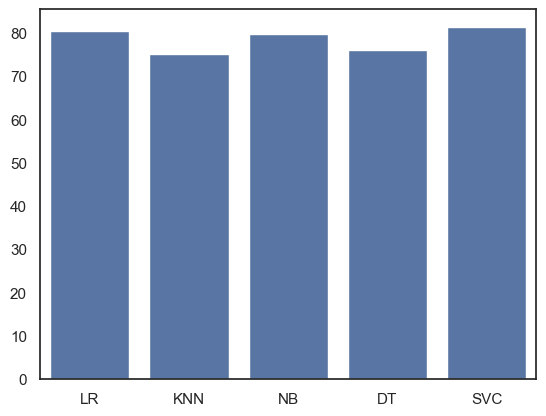

In [11]:
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
#ax = plt.set_xticklabels(labels = all_scores.keys())

### Logistic Regression with built-in Cross Validation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [13]:
X_train, X_test, y_train, y_test =  train_test_split(X_scaled,y)

In [14]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, max_iter=500).fit(X_train, y_train)

In [15]:
score = clf.score(X_train,y_train)
print('Accuracy_score : ',score)   

Accuracy_score :  0.8085106382978723


### Testing with test data

In [16]:
y_pred = clf.predict(X_test)

In [17]:
confusion_matrix(y_test,y_pred)

array([[21, 22],
       [ 1, 97]])

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.95      0.49      0.65        43
           Y       0.82      0.99      0.89        98

    accuracy                           0.84       141
   macro avg       0.88      0.74      0.77       141
weighted avg       0.86      0.84      0.82       141

